In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Classification

In [5]:
iris = load_iris()
X = iris.data[:,2:] #petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth= 2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

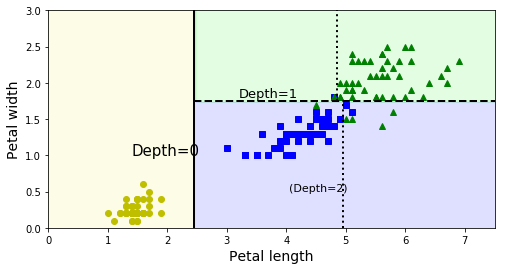

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline

def plot_decision_boundary(clf, X, y, axes = [0, 7.5, 0 , 3], iris = True, legend = False, plot_training = True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
    
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11) 
plt.show()


In [8]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [9]:
tree_clf.predict([[5,1.5]])

array([1])

In [10]:
X[(X[:,1] == X[:,1][y==1].max()) & (y == 1)] # widest Iris-Versicolor

array([[4.8, 1.8]])

In [17]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth = 2, random_state = 123)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

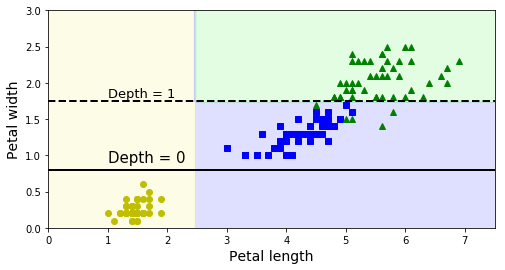

In [18]:
plt.figure(figsize = (8,4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend = False)
plt.plot([0, 7.5],[0.8,0.8],'k-', linewidth = 2)
plt.plot([0, 7.5],[1.75,1.75], 'k--', linewidth = 2)

plt.text(1.0,0.9,'Depth = 0', fontsize = 15)
plt.text(1.0,1.80, 'Depth = 1', fontsize = 13)
plt.show()

In [ ]:
### one of the many qualities of Decision Trees is that they require very little data preparation. In particular, 
### they dont require features scaling or centering at all.

In [ ]:
# pruning unnecessary nodes
# hyperparams: max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes, max_features. etc.

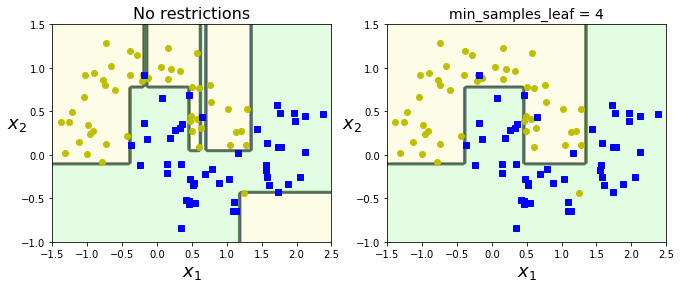

In [21]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples = 100, noise =0.25, random_state = 53)

deep_tree_clf1 = DecisionTreeClassifier(random_state =42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 4, random_state =42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize = (11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes = [-1.5,2.5,-1,1.5], iris = False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

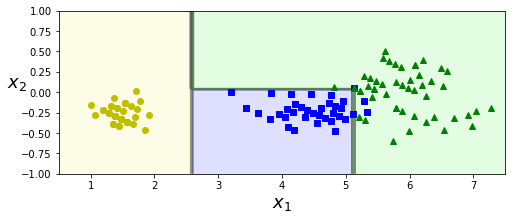

In [23]:
angle = np.pi/180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state = 42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize = (8,3))
plot_decision_boundary(tree_clf_r, Xr, y, axes = [0.5, 7.5, -1.0, 1], iris = False)

plt.show()

In [25]:
rotation_matrix

array([[ 0.93969262, -0.34202014],
       [ 0.34202014,  0.93969262]])

# Regression

In [29]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [30]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

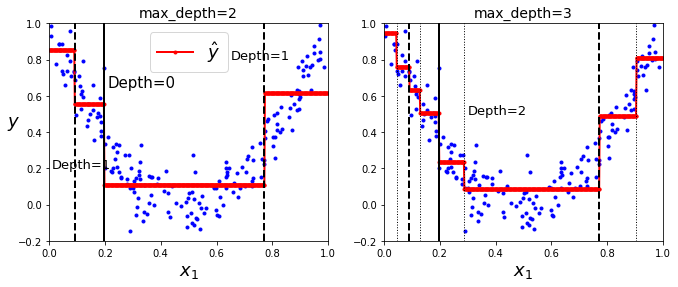

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg2 = DecisionTreeRegressor(max_depth = 3, random_state = 42)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

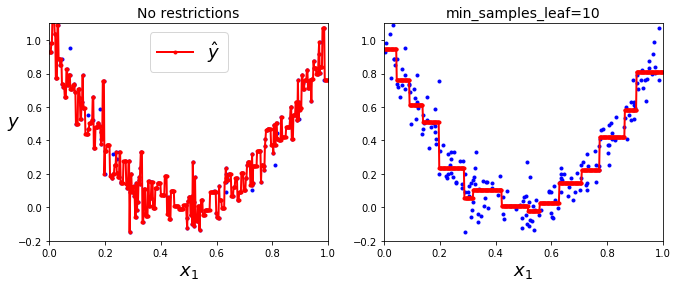

In [32]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

# some exercise

In [33]:
### Train and fine-tune a decision tree for the moons dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 10000, noise = 0.4, random_state = 123)

In [34]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [35]:
# use grid search with cross-validation to find good hyperparams for a DecisionTreeCLF
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes':list(range(2,100)), 'min_samples_split': [2,3,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state = 123), params, n_jobs = -1, verbose = 1, cv = 3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:   10.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       

In [36]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=32,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [37]:
from sklearn.metrics import accuracy_score
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8455

In [ ]:
## Grow a forest

In [ ]:
# generate 1000 subsets of the training set, each containing 100 instances selected randomly. 

8000

In [39]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instance = 100

mini_sets = []

rs = ShuffleSplit(n_splits = n_trees, test_size = len(X_train) - n_instance, random_state = 123)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [ ]:
## Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision 
## Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform 
## worse than the first Decision Tree, achieving only about 78% accuracy.

In [43]:
from sklearn.base import clone
forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]
accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.777305

In [48]:
## For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction
from scipy.stats import mode

Y_pred = np.empty([n_trees, len(X_test)],dtype = np.uint8)
for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [50]:
y_pred_majority_votes, n_votes = mode(Y_pred, axis = 0)

In [55]:
y_pred_majority_votes

array([[1, 0, 1, ..., 1, 1, 1]], dtype=uint8)

In [62]:
n_votes/len(X_test)

array([[0.4065, 0.408 , 0.494 , ..., 0.449 , 0.3385, 0.493 ]])

In [63]:
y_test.shape

(2000,)

In [68]:
y_pred_majority_votes.shape

(1, 2000)

In [69]:
accuracy_score(y_test, y_pred_majority_votes.reshape(-1)) 

0.8475